In [1]:
import numpy as np

import pandas as pd

from pandas import Series,DataFrame

# 聚类算法，cluster（一簇，一类）
# 只能用于分类，不能回归
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
football = pd.read_csv('./data/AsiaZoo.txt',header = None)

football.columns = ['国家','2006世界杯','2010世界杯','2007亚洲杯']

football

,国家,2006世界杯,2010世界杯,2007亚洲杯
0,中国,50,50,9
1,日本,28,9,4
2,韩国,17,15,3
3,伊朗,25,40,5
4,沙特,28,40,2
5,伊拉克,50,50,1
6,卡塔尔,50,40,9
7,阿联酋,50,40,9
8,乌兹别克斯坦,40,40,5
9,泰国,50,50,9


In [5]:
# 只有数据，没有目标值

# 算法，分类，相同级别球队分到一起（级别类似，数据就会类似，距离相近）

X = football.iloc[:,1:]
X

,2006世界杯,2010世界杯,2007亚洲杯
0,50,50,9
1,28,9,4
2,17,15,3
3,25,40,5
4,28,40,2
5,50,50,1
6,50,40,9
7,50,40,9
8,40,40,5
9,50,50,9


In [6]:
kmeans = KMeans(n_clusters=3)

In [7]:
# 使用算法学习
# 无监督学习，没有目标值y
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
y_ = kmeans.predict(X)
y_

array([1, 2, 2, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1])

In [14]:
cond = np.argwhere(y_ == 0)
cond = cond.reshape(-1)

football.loc[cond]

,国家,2006世界杯,2010世界杯,2007亚洲杯
3,伊朗,25,40,5
4,沙特,28,40,2
8,乌兹别克斯坦,40,40,5
12,巴林,40,40,9
13,朝鲜,40,32,17


In [15]:
cond = np.argwhere(y_ == 1)
cond = cond.reshape(-1)

football.loc[cond]

,国家,2006世界杯,2010世界杯,2007亚洲杯
0,中国,50,50,9
5,伊拉克,50,50,1
6,卡塔尔,50,40,9
7,阿联酋,50,40,9
9,泰国,50,50,9
10,越南,50,50,5
11,阿曼,50,50,9
14,印尼,50,50,9


In [16]:
cond = np.argwhere(y_ == 2)
cond = cond.reshape(-1)

football.loc[cond]

,国家,2006世界杯,2010世界杯,2007亚洲杯
1,日本,28,9,4
2,韩国,17,15,3


In [17]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

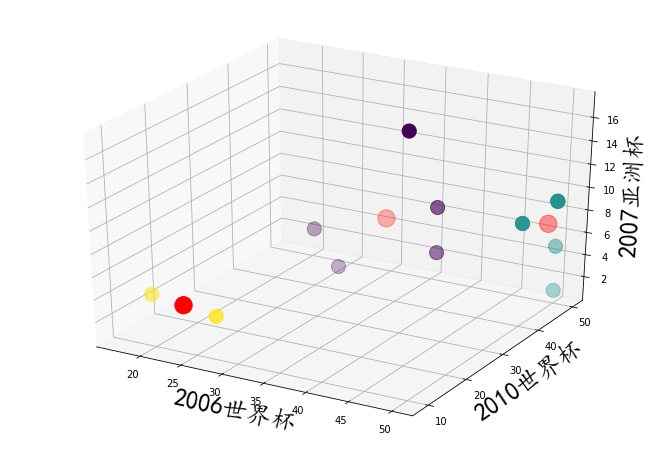

In [21]:
fig = plt.figure(figsize=(9,6))

axes3D = Axes3D(fig)

axes3D.scatter(football['2006世界杯'],football['2010世界杯'],football['2007亚洲杯'],c = y_,s = 200)

axes3D.set_xlabel('2006世界杯',fontproperties = 'KaiTi',fontsize = 25)
axes3D.set_ylabel('2010世界杯',fontproperties = 'KaiTi',fontsize = 25)
axes3D.set_zlabel('2007亚洲杯',fontproperties = 'KaiTi',fontsize = 25)

# 聚类算法，都有聚类中心
# 算法对数据学习结束
cluster_centers_ = kmeans.cluster_centers_

# 绘制聚类中心
axes3D.scatter(cluster_centers_[:,0],cluster_centers_[:,1],cluster_centers_[:,2],color = 'red',s = 300)